# **CAPSTONE MODULE 2:NYC TLC TRIP RECORD**

## **Latar Belakang**

TLC (Taxi and Limousine Commission) adalah badan pemerintah di New York City yang mengatur industri taksi dan limusin. Salah satu inovasi penting yang dilakukan oleh TLC adalah peluncuran "Green Taxis", yang dimulai pada tahun 2013, sebagai bagian dari upaya untuk memperluas layanan taksi ke area yang sebelumnya kurang terlayani, khususnya di luar Manhattan

## **Pernyataan Masalah**

Pada januari 2023 tercatat hanya 900 unit mobil taksi green yang beroperasi di New York city. Dalam upaya peningkatan pelayanan dan pemerataan green taksi, perlu adanya evaluasi **apakah perlu ada penambahan armada green taxi**, serta memetakan wilayah wilayah dengan frekuensi penggunaan taksi tertinggi dan terendah. Dengan demikian, perusahaan dapat memutuskan secara lebih tepat apakah perlu adanya tambahan jumlah armada taksi atau tidak, dan jika perlu wilayah seperti apa yang harus di fokuskan dan juga dapat memberikan solusi untuk peningkatan layanan.

Hal yang perlu di analisis:

**1. Persebaran wilayah**
- identifikasi area atau kawan dengan tingkat permintaan tinggi dan rendah

**2. Pendapatan**
- identifikasi pendapatan untuk melihat performa.

## **Data**

sebelum kita menganalisis data kita perlu untuk mengetahui informasih terkait isi data tersebut.

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [111]:
data_taxi=pd.read_csv('NYC TLC Trip Record.csv')
data_taxi.head(15)

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0          2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
1          2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2          2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3          1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4          1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
5          2  2023-01-01 00:53:31   2023-01-01 01:11:04                  N   
6          1  2023-01-01 00:09:14   2023-01-01 00:26:39                  N   
7          2  2023-01-01 00:11:58   2023-01-01 00:24:55                  N   
8          2  2023-01-01 00:41:29   2023-01-01 00:46:26                  N   
9          2  2023-01-01 00:50:32   2023-01-01 01:13:42                  N   
10         1  2023-01-01 00:16:12   2023-01-01 00:41:43                  N   
11         2  2023-01-01 00:08:43   2023-01-01 00:17:08                  N   
12         2  2023-01-01 00:26:32   2023-01-01 00:45:31                  N   
13         2  2023-01-01 00:18:35   2023-01-01 00:30:09                  N   
14         2  2023-01-01 00:39:32   2023-01-01 01:18:06                  N   

    RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0          1.0           166           143              1.0           2.58   
1          1.0            24            43              1.0           1.81   
2          1.0           223           179              1.0           0.00   
3          1.0            41           238              1.0           1.30   
4          1.0            41            74              1.0           1.10   
5          1.0            41           262              1.0           2.78   
6          1.0           181            45              2.0           3.80   
7          1.0            24            75              1.0           1.88   
8          1.0            41           166              2.0           1.11   
9          1.0            24           140              1.0           4.22   
10         1.0           255           234              2.0           4.80   
11         1.0            75           140              1.0           1.99   
12         1.0            75           148              1.0           7.08   
13         1.0            66           255              1.0           3.23   
14         1.0           255           186              1.0           5.91   

    fare_amount  extra  mta_tax  tip_amount  tolls_amount  ehail_fee  \
0          14.9   1.00      0.5        4.03           0.0        NaN   
1          10.7   1.00      0.5        2.64           0.0        NaN   
2           7.2   1.00      0.5        1.94           0.0        NaN   
3           6.5   0.50      1.5        1.70           0.0        NaN   
4           6.0   0.50      1.5        0.00           0.0        NaN   
5          17.7   1.00      0.5        0.00           0.0        NaN   
6          19.1   3.75      1.5        4.85           0.0        NaN   
7          14.2   1.00      0.5        0.00           0.0        NaN   
8           7.2   1.00      0.5        1.00           0.0        NaN   
9          24.7   1.00      0.5        3.00           0.0        NaN   
10         26.8   3.75      1.5        0.00           0.0        NaN   
11         11.4   1.00      0.5        3.33           0.0        NaN   
12         30.3   1.00      0.5        3.00           0.0        NaN   
13         17.7   1.00      0.5        4.04           0.0        NaN   
14         35.9   1.00      0.5        0.00           0.0        NaN   

    improvement_surcharge  total_amount  payment_type  trip_type  \
0                     1.0         24.18           1.0        1.0   
1                     1.0         15.84           1.0        1.0   
2                     1.0         11.64           1.0        1.0   
3                     1.0         10.20           1.0        1.0   
4            

## **Data Understanding & Cleaning**

Sebelum mulai cleaning kita perlu understanding data dengan cara mengetahui arti dari setiap kolom.

- **VendorID**
   - Ini menunjukkan perusahaan penyedia layanan taksi.
     - `1 = Creative Mobile Technologies, LLC.`
     - `2 = VeriFone Inc.` 
- **lpep_pickup_datetime**
   - Tanggal dan waktu saat taksi mulai mengaktifkan meteran (awal perjalanan)**lpep_dropoff_datetime**
   - Tanggal dan waktu saat taksi mematikan meteran (akhir perjalanan). **Passenger_count**
   - Jumlah penumpang yang ada di dalam taksi selama perjalanan. Ini adalah nilai yang dimasukkan oleh pengemudi. 
- **Trip_distance**
   - Jarak yang ditempuh selama perjalanan, diukur dalam mil oleh meteran taksi
- **PULocationID**
    Area (atau zona) tempat perjalanan dimulai (penjemputan) 
- **DOLocationID**
    Area (atau zona) tempat perjalanan berakhir (penurunan).
- **RateCodeID**
   - Jenis tarif yang berlaku untuk perjalanan pada saat perjalanan berakhir. Pilihannya termasuk:
     - `1 = Tarif standar`
     - `2 = Bandara JFK`
     - `3 = Bandara Newark`
     - `4 = Nassau atau Westchester County`
     - `5 = Tarif negosiasi (kesepakatan khusus)`
     - `6 = Perjalanan grup (berbagi dengan orang lain)` 
- **Store_and_fwd_flag**
   - Menunjukkan apakah detail perjalanan disimpan sementara karena taksi tidak dapat mengirimkan data pada saat itu (misalnya, karena masalah jaringan).
     - `Y = Ya, detail perjalanan disimpan dan dikirimkan nanti.`
     - `N = Tidak, detail perjalanan dikirimkan segera.`
- **Payment_type**
   - Metode pembayaran yang digunakan oleh penumpang untuk membayar perjalanan:
     - `1 = Kartu kredit`
     - `2 = Uang tunai`
     - `3 = Tidak ada biaya`
     - `4 = Perselisihan (masalah pembayaran)`
     - `5 = Tidak diketahui`
     - `6 = Perjalanan dibatalkan (tidak valid)`
- **Fare_amount**
   - Jumlah tarif untuk perjalanan yang dihitung berdasarkan waktu dan jarak, yang diukur oleh meteran taksi. Ini juga mencakup biaya tambahan untuk hal-hal seperti jam sibuk atau perjalanan malam.
- **MTA_tax**
   - Pajak wajib $0,50 yang ditambahkan ke tarif untuk membantu pendanaan Otoritas Transportasi Metropolitan New York (MTA).
- **Improvement_surcharge**
   - Biaya tambahan $0,30 yang dikenakan pada perjalanan untuk membiayai perbaikan sistem taksi. Ini dimulai pada tahun 2015.
- **Tip_amount**
   - Jumlah tip yang diberikan oleh penumpang, jika dibayar dengan kartu kredit. Tip tunai tidak termasuk di sini.
- **Tolls_amount**
   - Jumlah total biaya tol yang dibayar oleh penumpang selama perjalanan (misalnya, untuk jembatan atau terowongan).
- **Total_amount**
   - Jumlah total yang dibebankan kepada penumpang, yang mencakup tarif, pajak, biaya tambahan, dan biaya tol, tetapi tidak termasuk tip tunai.
- **Trip_type**
   - Jenis perjalanan:
     - `1 = Hentian jalan (penumpang menahan taksi di jalan)`
     - `2 = Pengiriman (taksi dipanggil melalui aplikasi atau telepon untuk dijemput)`


Ketika kita mendapatkan sebuah data hal pertama yang harus dilakukan adalah cleaning karena data yang kita miliki masih banyak kesalahan seperti masih ada data yang kosong ada juga tipe data yang masih salah, maka dari itu kita di minta menghadle terlebih dahulu sebelum menganalisis

In [112]:
display(data_taxi.describe(),data_taxi.describe(include='object'))

VendorID    RatecodeID  PULocationID  DOLocationID  \
count  68211.000000  63887.000000  68211.000000  68211.000000   
mean       1.863028      1.117160     98.549735    138.429901   
std        0.343820      1.372913     61.244314     76.761311   
min        1.000000      1.000000      1.000000      1.000000   
25%        2.000000      1.000000     74.000000     74.000000   
50%        2.000000      1.000000     75.000000    138.000000   
75%        2.000000      1.000000    129.000000    219.000000   
max        2.000000     99.000000    265.000000    265.000000   

       passenger_count  trip_distance   fare_amount         extra  \
count     63887.000000   68211.000000  68211.000000  68211.000000   
mean          1.315870       8.114852     16.603545      0.825431   
std           0.979054     585.105955     13.470121      1.269904   
min           0.000000       0.000000    -70.000000     -2.500000   
25%           1.000000       1.110000      9.300000      0.000000   
50%           1.000000       1.850000     13.500000      0.000000   
75%           1.000000       3.210000     19.800000      1.000000   
max           9.000000  120098.840000    490.000000     12.500000   

            mta_tax    tip_amount  tolls_amount  ehail_fee  \
count  68211.000000  68211.000000  68211.000000        0.0   
mean       0.588340      2.139012      0.169627        NaN   
std        0.385819      3.052710      1.099789        NaN   
min       -0.500000    -10.500000      0.000000        NaN   
25%        0.500000      0.000000      0.000000        NaN   
50%        0.500000      1.600000      0.000000        NaN   
75%        0.500000      3.330000      0.000000        NaN   
max        2.750000    222.220000     36.050000        NaN   

       improvement_surcharge  total_amount  payment_type     trip_type  \
count           68211.000000  68211.000000  63887.000000  63877.000000   
mean                0.951625     21.789377      1.373613      1.021933   
std                 0.196875     15.457115      0.508039      0.146465   
min                -1.000000    -71.500000      1.000000      1.000000   
25%                 1.000000     12.900000      1.000000      1.000000   
50%                 1.000000     17.900000      1.000000      1.000000   
75%                 1.000000     26.150000      2.000000      1.000000   
max                 1.000000    491.000000      5.000000      2.000000   

       congestion_surcharge  
count          63887.000000  
mean               0.726748  
std                1.212836  
min               -2.750000  
25%                0.000000  
50%                0.000000  
75%                2.750000  
max                2.750000

lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag
count                 68211                 68211              63887
unique                66575                 66519                  2
top     2023-01-07 23:58:06   2023-01-06 00:00:00                  N
freq                      4                     6              63579

In [113]:
pd.set_option('display.max_colwidth', None)
list_item = []
for kolom in data_taxi.columns:
    list_item.append([kolom,data_taxi[kolom].nunique(),data_taxi[kolom].unique()])

tabel = pd.DataFrame(columns=['Column name','total unique','unique'],data=list_item)
tabel

Column name  total unique  \
0                VendorID             2   
1    lpep_pickup_datetime         66575   
2   lpep_dropoff_datetime         66519   
3      store_and_fwd_flag             2   
4              RatecodeID             6   
5            PULocationID           226   
6            DOLocationID           249   
7         passenger_count            10   
8           trip_distance          1870   
9             fare_amount          2553   
10                  extra            16   
11                mta_tax             6   
12             tip_amount          1492   
13           tolls_amount            26   
14              ehail_fee             0   
15  improvement_surcharge             5   
16           total_amount          4670   
17           payment_type             5   
18              trip_type             2   
19   congestion_surcharge             4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       unique  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

- dataset NYC TLC memiliki 20 kolom dan 68211 baris
- pada kolom `store_and_fwd_flag`,`passenger_count`,`pament_type`,`trip_type`,`congestion_surcharge` masih banyak terdapat kmissing value.
- kolom `ehail free` perlu di hapus karena isinya 100% null


### **Missing Value**

In [114]:
data_taxi.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [115]:
data_taxi.isna().sum()/data_taxi.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

<Axes: >

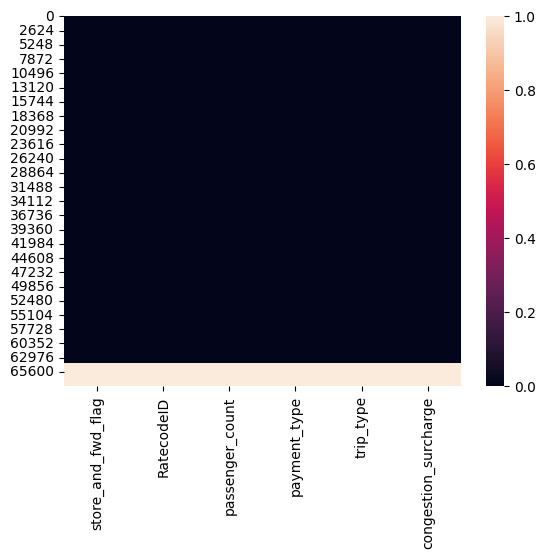

In [116]:
sns.heatmap(data_taxi[['store_and_fwd_flag','RatecodeID','passenger_count','payment_type','trip_type','congestion_surcharge']].isna())

secara garis baris:

- semua kolom memiliki proporsi yang sama yaitu (6%) dan semua kolom berkaitan sehingga missing value nya berada di baris yang sama 

cara mengatasi missing value:

- cara yang akan di gunakan disini adalah dengan menghapus baris yang berisi missing value dengan di subset kepada `passenger_count` karena value dari kolom tersebut perlu di input oleh driver sehingga butuh data yang akurat kurang cocok untuk menggunakan median/mean karena antar value nya sendiri tidak terlalu berbeda nilai nya dan tidak ada ciri khusus.


In [117]:
data_taxi.drop(columns='ehail_fee',inplace=True)

In [118]:
data_taxi.dropna(subset='passenger_count',inplace=True)

In [119]:
data_taxi.isna().sum()

VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                10
congestion_surcharge      0
dtype: int64

terisa 10 missing value dari kolom `trip_type`, untuk itu perlu di lihat apakah data tersebut harus di hapus atau tidak.

In [120]:
index_nan=data_taxi.loc[data_taxi['trip_type'].isna()].index

In [121]:
data_taxi.loc[index_nan]

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
1084          1  2023-01-01 19:44:13   2023-01-01 19:58:30                  N   
2174          1  2023-01-02 16:39:05   2023-01-02 17:31:42                  N   
9055          1  2023-01-05 20:33:45   2023-01-05 22:46:41                  N   
14125         1  2023-01-08 11:36:41   2023-01-08 12:14:59                  N   
29143         1  2023-01-15 13:51:42   2023-01-15 14:37:38                  N   
29711         1  2023-01-15 17:52:52   2023-01-15 22:11:55                  N   
35975         1  2023-01-19 01:07:59   2023-01-19 01:17:19                  N   
37691         1  2023-01-19 17:16:59   2023-01-19 22:29:53                  N   
42432         1  2023-01-21 20:29:58   2023-01-22 02:59:25                  N   
45204         1  2023-01-23 13:45:11   2023-01-23 23:36:42                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
1084         99.0           150            55              1.0            3.3   
2174         99.0            73            82              1.0            3.7   
9055         99.0            14           123              1.0            6.2   
14125        99.0            61            77              1.0            2.7   
29143        99.0           108           181              1.0            6.5   
29711        99.0           150           123              1.0            1.6   
35975        99.0            90            68              1.0            0.6   
37691        99.0           265           123              1.0           14.6   
42432        99.0           150           123              1.0            1.4   
45204        99.0           244           248              1.0           28.3   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
1084          18.2    0.0      1.5         0.0           0.0   
2174          23.5    0.0      1.5         0.0           0.0   
9055          28.2    0.0      1.5         0.0           0.0   
14125         22.5    0.0      1.5         0.0           0.0   
29143         24.2    0.0      1.5         0.0           0.0   
29711         15.2    0.0      1.5         0.0           0.0   
35975         15.2    0.0      1.5         0.0           0.0   
37691         40.2    0.0      1.5         0.0           0.0   
42432         15.2    0.0      1.5         0.0           0.0   
45204         50.2    0.0      1.5         0.0           0.0   

       improvement_surcharge  total_amount  payment_type  trip_type  \
1084                     1.0          19.7           1.0        NaN   
2174                     1.0          25.0           1.0        NaN   
9055                     1.0          29.7           1.0        NaN   
14125                    1.0          24.0           1.0        NaN   
29143                    1.0          25.7           1.0        NaN   
29711                    1.0          16.7           1.0        NaN   
35975                    1.0          16.7           1.0        NaN   
37691                    1.0          41.7           1.0        NaN   
42432                    1.0          16.7           1.0        NaN   
45204                    1.0          51.7           1.0        NaN   

       congestion_surcharge  
1084                    0.0  
2174                    0.0  
9055                    0.0  
14125                   0.0  
29143                   0.0  
29711                   0.0  
35975                   0.0  
37691                   0.0  
42432                   0.0  
45204                   0.0

### **Outliers**

<Axes: xlabel='fare_amount'>

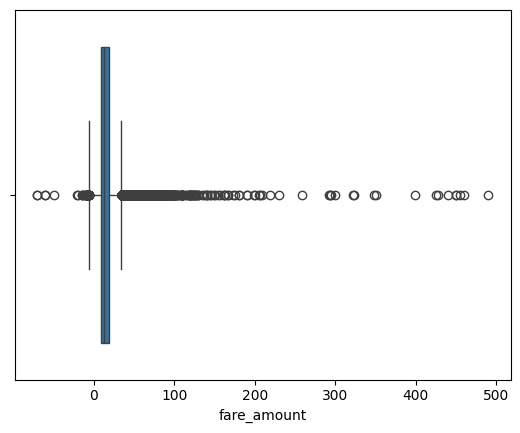

In [122]:
sns.boxplot(data=data_taxi,x='fare_amount')

In [123]:
data_taxi[data_taxi['fare_amount']>400]

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
18474         2  2023-01-10 15:58:15   2023-01-10 15:58:26                  N   
21547         2  2023-01-11 20:52:23   2023-01-11 20:52:33                  N   
30047         2  2023-01-15 21:57:15   2023-01-15 21:57:20                  N   
42278         2  2023-01-21 19:47:15   2023-01-21 19:51:20                  N   
46373         2  2023-01-23 20:43:48   2023-01-23 20:43:53                  N   
50526         2  2023-01-25 17:14:16   2023-01-25 17:21:43                  N   
53670         2  2023-01-26 21:26:12   2023-01-26 21:26:17                  N   
59442         2  2023-01-29 20:01:58   2023-01-29 20:05:25                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
18474         5.0            92            92              1.0           0.38   
21547         5.0           130           130              1.0           0.00   
30047         5.0           191           191              1.0           0.00   
42278         5.0            92            92              1.0           0.00   
46373         5.0           130           130              1.0           0.00   
50526         5.0            80            37              1.0           0.60   
53670         5.0           129           129              1.0           0.00   
59442         5.0            92            92              1.0           0.07   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
18474        440.0    0.0      0.0         0.0           0.0   
21547        490.0    0.0      0.0         0.0           0.0   
30047        450.0    0.0      0.0         0.0           0.0   
42278        450.0    0.0      0.0         0.0           0.0   
46373        459.9    0.0      0.0         0.0           0.0   
50526        425.0    0.0      0.0         0.0           0.0   
53670        428.0    0.0      0.0         0.0           0.0   
59442        455.0    0.0      0.0         0.0           0.0   

       improvement_surcharge  total_amount  payment_type  trip_type  \
18474                    1.0         441.0           2.0        2.0   
21547                    1.0         491.0           2.0        2.0   
30047                    1.0         451.0           2.0        2.0   
42278                    1.0         451.0           2.0        2.0   
46373                    1.0         460.9           2.0        2.0   
50526                    1.0         426.0           2.0        2.0   
53670                    1.0         429.0           2.0        2.0   
59442                    1.0         456.0           2.0        2.0   

       congestion_surcharge  
18474                   0.0  
21547                   0.0  
30047                   0.0  
42278                   0.0  
46373                   0.0  
50526                   0.0  
53670                   0.0  
59442                   0.0

Setelah pengecekan outliers pada `fare_amount` terdapat data bahwa tarif nya lebih dari 400 dollar, berdasarkan `trip_distance` dan domain knowledge untuk trip dengan jarak yang dekat tidak mungkin mencapai tarif 400 dollar maka outliers tersebut akan kita hapus.

In [124]:
drop_fare=data_taxi[data_taxi['fare_amount']>400].index
data_taxi.drop(drop_fare,inplace=True)
data_taxi[data_taxi['fare_amount']>400]

Empty DataFrame
Columns: [VendorID, lpep_pickup_datetime, lpep_dropoff_datetime, store_and_fwd_flag, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge]
Index: []

<Axes: xlabel='tip_amount'>

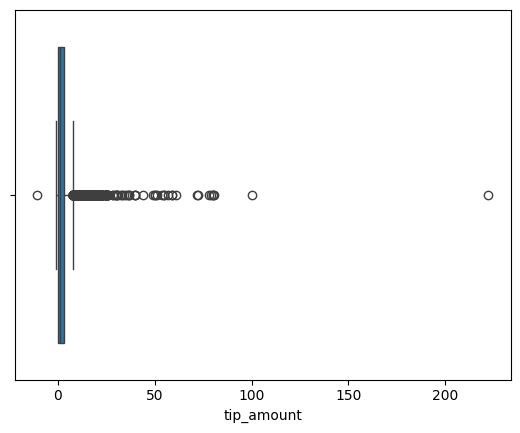

In [125]:
sns.boxplot(data=data_taxi,x='tip_amount')

In [126]:
data_taxi[data_taxi['tip_amount']>=100]

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
26702         2  2023-01-14 07:17:30   2023-01-14 07:18:06                  N   
50588         2  2023-01-25 18:24:30   2023-01-25 18:28:48                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
26702         1.0           265           265              1.0           0.00   
50588         1.0           223           223              1.0           0.76   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
26702          3.0    0.0      0.5      100.00           0.0   
50588          6.5    2.5      0.5      222.22           0.0   

       improvement_surcharge  total_amount  payment_type  trip_type  \
26702                    1.0        104.50           1.0        1.0   
50588                    1.0        232.72           1.0        1.0   

       congestion_surcharge  
26702                   0.0  
50588                   0.0

Pada `tip_amount` terdapat nilai tip yang tidak normal jika di lihat dari jumlah tarif yang di bayar, maka yang akan di lakukan adalah mengahpus nilai tersebut karena jumlah nya juga hanya sedikit tidak mempengaruhi value yang lain.

In [127]:
drop_tip=data_taxi[data_taxi['tip_amount']>=100].index
data_taxi.drop(drop_tip,inplace=True)
data_taxi[data_taxi['tip_amount']>=100]

Empty DataFrame
Columns: [VendorID, lpep_pickup_datetime, lpep_dropoff_datetime, store_and_fwd_flag, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge]
Index: []

<Axes: xlabel='passenger_count'>

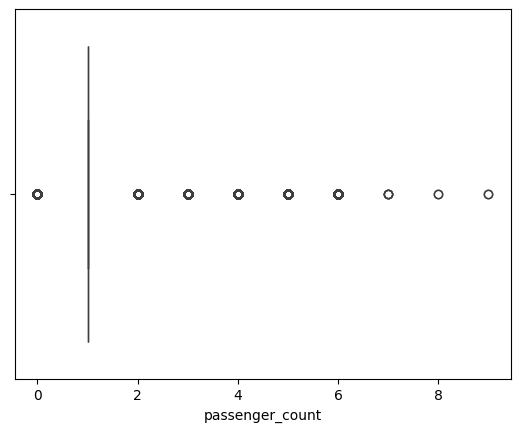

In [128]:
sns.boxplot(data=data_taxi,x='passenger_count')

In [129]:
data_taxi[data_taxi['passenger_count']>7]

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
11478         2  2023-01-06 21:10:08   2023-01-06 21:10:11                  N   
26612         2  2023-01-14 03:09:48   2023-01-14 03:09:50                  N   
29824         2  2023-01-15 19:21:14   2023-01-15 19:21:17                  N   
44307         2  2023-01-22 23:40:13   2023-01-22 23:40:21                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
11478         5.0           265           265              9.0           0.00   
26612         5.0            95            95              8.0           0.12   
29824         5.0            75            75              8.0           0.00   
44307         5.0            83            83              9.0           0.00   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
11478        90.00    0.0      0.0         6.0           0.0   
26612         8.90    0.0      0.0         5.0           0.0   
29824         8.00    0.0      0.0         1.0           0.0   
44307         9.99    0.0      0.0         2.2           0.0   

       improvement_surcharge  total_amount  payment_type  trip_type  \
11478                    0.3         96.30           1.0        2.0   
26612                    1.0         14.90           1.0        2.0   
29824                    1.0         10.00           1.0        2.0   
44307                    1.0         13.19           1.0        2.0   

       congestion_surcharge  
11478                   0.0  
26612                   0.0  
29824                   0.0  
44307                   0.0

untuk data passenger lebih dari 7 maka akan di hapus karena berdasarkan aturan taxi di new york bahwa maximal penumpang itu hanya 5 dan boleh di tambah dengan bayi, maka kemungkinan kecil untuk sebuah taxi ber penumpang lebih dari 7, dan di lihat dari data untuk penumpang lebih dari tujuh nilai data nya seperti tidak normal.

In [130]:
drop_passenger=data_taxi[data_taxi['passenger_count']>7].index
data_taxi.drop(drop_passenger,inplace=True)
data_taxi[data_taxi['passenger_count']>7]

Empty DataFrame
Columns: [VendorID, lpep_pickup_datetime, lpep_dropoff_datetime, store_and_fwd_flag, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge]
Index: []

<Axes: xlabel='trip_distance'>

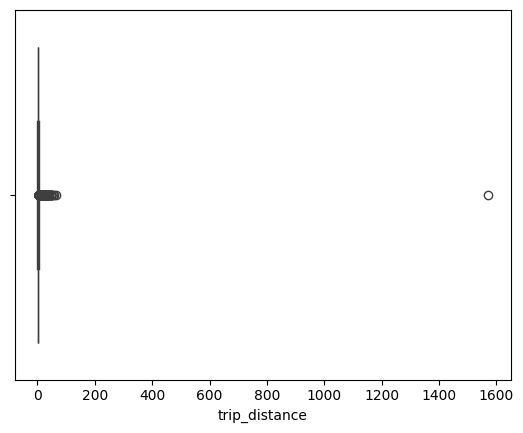

In [131]:
sns.boxplot(data=data_taxi,x='trip_distance')

disini kita akan menghapus outliers pada trip distance karena datanya sedikit dan juga termasuk anomali yang tidak bisa di perbaiki

In [132]:
data_taxi[data_taxi['trip_distance']>1400]

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
33373         2  2023-01-17 18:40:38   2023-01-17 19:04:45                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
33373         5.0            82           236              1.0        1571.97   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
33373        29.97    0.0      0.0        3.04          6.55   

       improvement_surcharge  total_amount  payment_type  trip_type  \
33373                    1.0         43.31           1.0        1.0   

       congestion_surcharge  
33373                  2.75

In [133]:
drop_trip=data_taxi[data_taxi['trip_distance']>1400].index
data_taxi.drop(drop_trip,inplace=True)
data_taxi[data_taxi['trip_distance']>1400]

Empty DataFrame
Columns: [VendorID, lpep_pickup_datetime, lpep_dropoff_datetime, store_and_fwd_flag, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge]
Index: []

<Axes: xlabel='RatecodeID'>

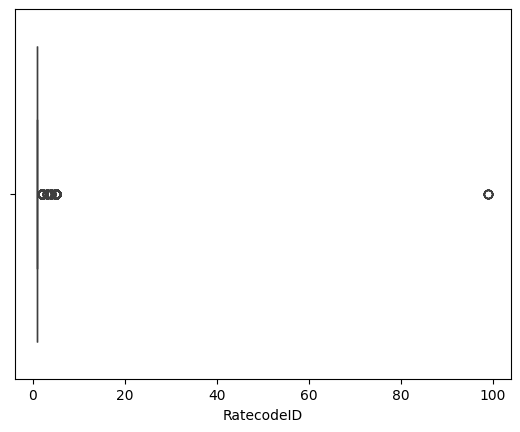

In [134]:
sns.boxplot(data=data_taxi,x='RatecodeID')

Pada kolom `RatecodeID` terdapat sebuah data anomali yaitu kode 99 data tersebut tidak ada pada dictionary dataset NYC oleh karena itu kita bisa langsung menghapus data tersebut karena ketika dilihat data tersebut tidak normal karena terdapat `trip_distance` namun waktu pick dan drop off tidak berubah.

In [135]:
data_taxi[data_taxi['RatecodeID']==99.0]

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
1084          1  2023-01-01 19:44:13   2023-01-01 19:58:30                  N   
2174          1  2023-01-02 16:39:05   2023-01-02 17:31:42                  N   
9055          1  2023-01-05 20:33:45   2023-01-05 22:46:41                  N   
14125         1  2023-01-08 11:36:41   2023-01-08 12:14:59                  N   
29143         1  2023-01-15 13:51:42   2023-01-15 14:37:38                  N   
29711         1  2023-01-15 17:52:52   2023-01-15 22:11:55                  N   
35975         1  2023-01-19 01:07:59   2023-01-19 01:17:19                  N   
37691         1  2023-01-19 17:16:59   2023-01-19 22:29:53                  N   
42432         1  2023-01-21 20:29:58   2023-01-22 02:59:25                  N   
45204         1  2023-01-23 13:45:11   2023-01-23 23:36:42                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
1084         99.0           150            55              1.0            3.3   
2174         99.0            73            82              1.0            3.7   
9055         99.0            14           123              1.0            6.2   
14125        99.0            61            77              1.0            2.7   
29143        99.0           108           181              1.0            6.5   
29711        99.0           150           123              1.0            1.6   
35975        99.0            90            68              1.0            0.6   
37691        99.0           265           123              1.0           14.6   
42432        99.0           150           123              1.0            1.4   
45204        99.0           244           248              1.0           28.3   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
1084          18.2    0.0      1.5         0.0           0.0   
2174          23.5    0.0      1.5         0.0           0.0   
9055          28.2    0.0      1.5         0.0           0.0   
14125         22.5    0.0      1.5         0.0           0.0   
29143         24.2    0.0      1.5         0.0           0.0   
29711         15.2    0.0      1.5         0.0           0.0   
35975         15.2    0.0      1.5         0.0           0.0   
37691         40.2    0.0      1.5         0.0           0.0   
42432         15.2    0.0      1.5         0.0           0.0   
45204         50.2    0.0      1.5         0.0           0.0   

       improvement_surcharge  total_amount  payment_type  trip_type  \
1084                     1.0          19.7           1.0        NaN   
2174                     1.0          25.0           1.0        NaN   
9055                     1.0          29.7           1.0        NaN   
14125                    1.0          24.0           1.0        NaN   
29143                    1.0          25.7           1.0        NaN   
29711                    1.0          16.7           1.0        NaN   
35975                    1.0          16.7           1.0        NaN   
37691                    1.0          41.7           1.0        NaN   
42432                    1.0          16.7           1.0        NaN   
45204                    1.0          51.7           1.0        NaN   

       congestion_surcharge  
1084                    0.0  
2174                    0.0  
9055                    0.0  
14125                   0.0  
29143                   0.0  
29711                   0.0  
35975                   0.0  
37691                   0.0  
42432                   0.0  
45204                   0.0

In [136]:
data_99=data_taxi[data_taxi['RatecodeID']==99.0].index
data_taxi.drop(data_99,inplace=True)
data_taxi[data_taxi['RatecodeID']==99.0]

Empty DataFrame
Columns: [VendorID, lpep_pickup_datetime, lpep_dropoff_datetime, store_and_fwd_flag, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge]
Index: []

In [137]:
data_taxi[(data_taxi['total_amount']<0) | (data_taxi['payment_type']=='4.0')]

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
662           2  2023-01-01 14:58:13   2023-01-01 14:58:39                  N   
898           2  2023-01-01 17:24:52   2023-01-01 17:25:12                  N   
1317          2  2023-01-02 02:05:08   2023-01-02 02:12:57                  N   
1686          2  2023-01-02 12:56:53   2023-01-02 13:00:10                  N   
1864          2  2023-01-02 13:51:33   2023-01-02 13:52:42                  N   
...         ...                  ...                   ...                ...   
63358         2  2023-01-31 18:39:16   2023-01-31 18:39:29                  N   
63544         2  2023-01-31 19:06:18   2023-01-31 19:06:46                  N   
63655         2  2023-01-31 20:29:00   2023-01-31 20:29:14                  N   
63807         2  2023-01-31 22:44:16   2023-01-31 22:45:18                  N   
63868         2  2023-01-31 23:44:44   2023-01-31 23:45:15                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
662           1.0            75            74              2.0           0.17   
898           1.0           193           193              1.0           0.00   
1317          1.0           129            82              1.0           0.64   
1686          1.0            75            75              1.0           0.77   
1864          1.0            75            75              2.0           0.08   
...           ...           ...           ...              ...            ...   
63358         1.0           130           130              3.0           0.05   
63544         1.0            75            75              2.0           0.08   
63655         1.0            74            74              1.0           0.00   
63807         1.0           256           256              1.0           0.15   
63868         5.0           264           264              1.0           0.00   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
662           -3.0    0.0     -0.5         0.0           0.0   
898           -3.0    0.0     -0.5         0.0           0.0   
1317          -8.6   -1.0     -0.5         0.0           0.0   
1686          -4.5    0.0     -0.5         0.0           0.0   
1864          -3.7    0.0     -0.5         0.0           0.0   
...            ...    ...      ...         ...           ...   
63358         -3.0   -2.5     -0.5         0.0           0.0   
63544         -3.0   -2.5     -0.5         0.0           0.0   
63655         -2.5   -0.5     -0.5         0.0           0.0   
63807         -3.7   -1.0     -0.5         0.0           0.0   
63868        -10.0    0.0      0.0         0.0           0.0   

       improvement_surcharge  total_amount  payment_type  trip_type  \
662                     -1.0          -4.5           3.0        1.0   
898                     -1.0          -4.5           4.0        1.0   
1317                    -1.0         -11.1           3.0        1.0   
1686                    -0.3          -5.3           4.0        1.0   
1864                    -1.0          -5.2           3.0        1.0   
...                      ...           ...           ...        ...   
63358                   -1.0          -7.0           4.0        1.0   
63544                   -1.0          -7.0           3.0        1.0   
63655                   -0.3          -3.8           3.0        1.0   
63807                   -1.0          -6.2           3.0        1.0   
63868                   -1.0         -11.0           4.0        2.0   

       congestion_surcharge  
662                     0.0  
898                     0.0  
1317                    0.0  
1686                    0.0  
1864                    0.0  
...                     ...  
63358                   0.0  
63544                   0.0  
63655                   0.0  
63807                   0.0  
63868                   0.0  

[174 rows x 19 columns]

In [138]:
data_taxi[(data_taxi['total_amount']<0) | (data_taxi['payment_type']=='3.0')]

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
662           2  2023-01-01 14:58:13   2023-01-01 14:58:39                  N   
898           2  2023-01-01 17:24:52   2023-01-01 17:25:12                  N   
1317          2  2023-01-02 02:05:08   2023-01-02 02:12:57                  N   
1686          2  2023-01-02 12:56:53   2023-01-02 13:00:10                  N   
1864          2  2023-01-02 13:51:33   2023-01-02 13:52:42                  N   
...         ...                  ...                   ...                ...   
63358         2  2023-01-31 18:39:16   2023-01-31 18:39:29                  N   
63544         2  2023-01-31 19:06:18   2023-01-31 19:06:46                  N   
63655         2  2023-01-31 20:29:00   2023-01-31 20:29:14                  N   
63807         2  2023-01-31 22:44:16   2023-01-31 22:45:18                  N   
63868         2  2023-01-31 23:44:44   2023-01-31 23:45:15                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
662           1.0            75            74              2.0           0.17   
898           1.0           193           193              1.0           0.00   
1317          1.0           129            82              1.0           0.64   
1686          1.0            75            75              1.0           0.77   
1864          1.0            75            75              2.0           0.08   
...           ...           ...           ...              ...            ...   
63358         1.0           130           130              3.0           0.05   
63544         1.0            75            75              2.0           0.08   
63655         1.0            74            74              1.0           0.00   
63807         1.0           256           256              1.0           0.15   
63868         5.0           264           264              1.0           0.00   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
662           -3.0    0.0     -0.5         0.0           0.0   
898           -3.0    0.0     -0.5         0.0           0.0   
1317          -8.6   -1.0     -0.5         0.0           0.0   
1686          -4.5    0.0     -0.5         0.0           0.0   
1864          -3.7    0.0     -0.5         0.0           0.0   
...            ...    ...      ...         ...           ...   
63358         -3.0   -2.5     -0.5         0.0           0.0   
63544         -3.0   -2.5     -0.5         0.0           0.0   
63655         -2.5   -0.5     -0.5         0.0           0.0   
63807         -3.7   -1.0     -0.5         0.0           0.0   
63868        -10.0    0.0      0.0         0.0           0.0   

       improvement_surcharge  total_amount  payment_type  trip_type  \
662                     -1.0          -4.5           3.0        1.0   
898                     -1.0          -4.5           4.0        1.0   
1317                    -1.0         -11.1           3.0        1.0   
1686                    -0.3          -5.3           4.0        1.0   
1864                    -1.0          -5.2           3.0        1.0   
...                      ...           ...           ...        ...   
63358                   -1.0          -7.0           4.0        1.0   
63544                   -1.0          -7.0           3.0        1.0   
63655                   -0.3          -3.8           3.0        1.0   
63807                   -1.0          -6.2           3.0        1.0   
63868                   -1.0         -11.0           4.0        2.0   

       congestion_surcharge  
662                     0.0  
898                     0.0  
1317                    0.0  
1686                    0.0  
1864                    0.0  
...                     ...  
63358                   0.0  
63544                   0.0  
63655                   0.0  
63807                   0.0  
63868                   0.0  

[174 rows x 19 columns]

Setelah melihat value minus pada data, dan banyak nya minus value pada tipe pembayaran 3.0 (no charge) dan 4.0 (dispute) dan ketika di lihat dari kolom lain bahwa value minus tersebut memiliki persamaan dengan value yang tidak minus atau relatif dengan index setelahnya dapat di simpulkan bahwa data minus ini merupakan data yang merupakan pengurangan karena pembayaran dispute adalah pembayaran yang tidak di lakukan karena berselisih atau tidak sepakat, sedangkan untuk no charge dapat di artikan dengan gratis, oleh karena itu value minus ini dapat di hapus saja agar tidak tumpang tindih dengan value yang tidak minus nya.

In [139]:
data_taxi[(data_taxi['PULocationID']==75) & (data_taxi['DOLocationID']==74)]

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
20            2  2023-01-01 00:26:21   2023-01-01 00:30:26                  N   
33            2  2023-01-01 00:20:23   2023-01-01 00:24:32                  N   
82            2  2023-01-01 01:03:59   2023-01-01 01:07:17                  N   
341           2  2023-01-01 08:56:08   2023-01-01 09:03:44                  N   
350           2  2023-01-01 09:37:48   2023-01-01 09:40:23                  N   
...         ...                  ...                   ...                ...   
63659         2  2023-01-31 20:45:55   2023-01-31 20:52:46                  N   
63688         2  2023-01-31 21:10:15   2023-01-31 21:15:39                  N   
63748         2  2023-01-31 21:39:41   2023-01-31 21:43:36                  N   
63761         2  2023-01-31 21:18:58   2023-01-31 21:22:36                  N   
63850         2  2023-01-31 22:57:11   2023-01-31 23:02:46                  N   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
20            1.0            75            74              1.0           0.96   
33            1.0            75            74              2.0           1.39   
82            1.0            75            74              1.0           0.53   
341           1.0            75            74              1.0           1.13   
350           1.0            75            74              1.0           1.13   
...           ...           ...           ...              ...            ...   
63659         1.0            75            74              1.0           1.38   
63688         1.0            75            74              2.0           1.38   
63748         1.0            75            74              5.0           1.34   
63761         1.0            75            74              1.0           1.01   
63850         1.0            75            74              1.0           1.73   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
20             7.2    1.0      0.5        2.42           0.0   
33             7.9    1.0      0.5        0.00           0.0   
82             5.8    1.0      0.5        0.00           0.0   
341            7.0    0.0      0.5        0.00           0.0   
350            6.5    0.0      0.5        0.00           0.0   
...            ...    ...      ...         ...           ...   
63659          9.3    1.0      0.5        0.00           0.0   
63688          8.6    1.0      0.5        2.22           0.0   
63748          7.9    1.0      0.5        2.08           0.0   
63761          6.5    1.0      0.5        0.00           0.0   
63850          9.3    1.0      0.5        2.36           0.0   

       improvement_surcharge  total_amount  payment_type  trip_type  \
20                       1.0         12.12           1.0        1.0   
33                       1.0         10.40           2.0        1.0   
82                       1.0          8.30           2.0        1.0   
341                      0.3          7.80           2.0        1.0   
350                      1.0          8.00           2.0        1.0   
...                      ...           ...           ...        ...   
63659                    1.0         11.80           2.0        1.0   
63688                    1.0         13.32           1.0        1.0   
63748                    1.0         12.48           1.0        1.0   
63761                    1.0          9.00           2.0        1.0   
63850                    1.0         14.16           1.0        1.0   

       congestion_surcharge  
20                      0.0  
33                      0.0  
82                      0.0  
341                     0.0  
350                     0.0  
...                     ...  
63659                   0.0  
63688                   0.0  
63748                   0.0  
63761                   0.0  
63850                   0.0  

[1429 rows x 19 columns]

In [140]:
data_taxi[['lpep_pickup_datetime']].sort_values(by='lpep_pickup_datetime').head(3)

lpep_pickup_datetime
17874  2009-01-01 20:21:27
298    2022-12-09 14:10:49
318    2022-12-09 14:55:42

In [141]:
tanggal=data_taxi[['lpep_pickup_datetime']].sort_values(by='lpep_pickup_datetime').head(3).index
data_taxi.drop(tanggal,inplace=True)

In [142]:
data_taxi[['lpep_pickup_datetime']].sort_values(by='lpep_pickup_datetime').head(3)

lpep_pickup_datetime
24  2023-01-01 00:01:31
44  2023-01-01 00:04:25
57  2023-01-01 00:06:48

### **Data Formatting**

In [143]:
data_taxi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63859 entries, 0 to 63886
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               63859 non-null  int64  
 1   lpep_pickup_datetime   63859 non-null  object 
 2   lpep_dropoff_datetime  63859 non-null  object 
 3   store_and_fwd_flag     63859 non-null  object 
 4   RatecodeID             63859 non-null  float64
 5   PULocationID           63859 non-null  int64  
 6   DOLocationID           63859 non-null  int64  
 7   passenger_count        63859 non-null  float64
 8   trip_distance          63859 non-null  float64
 9   fare_amount            63859 non-null  float64
 10  extra                  63859 non-null  float64
 11  mta_tax                63859 non-null  float64
 12  tip_amount             63859 non-null  float64
 13  tolls_amount           63859 non-null  float64
 14  improvement_surcharge  63859 non-null  float64
 15  total_a

1. `VendorID` & `RatecodeID`--> object karena termasuk kategori 
2. `Passenger count` --> int karena jumlah orang tidak mungkin float
3. `trip_type` --> menjadi object karena kategorikal
4. `payment_type` --> menjadi object karena kategorikal

5.  `lpep_pickup_datetime` & `lpep_dropoff_datetime `--> menjadi date time 

In [144]:
data_taxi[['VendorID','RatecodeID','trip_type','payment_type']]=data_taxi[['VendorID','RatecodeID','trip_type','payment_type']].astype(str)

In [145]:
data_taxi['passenger_count']=data_taxi['passenger_count'].astype(int)

In [146]:
data_taxi['lpep_pickup_datetime']=pd.to_datetime(data_taxi['lpep_pickup_datetime'])

In [147]:
data_taxi['lpep_dropoff_datetime']=pd.to_datetime(data_taxi['lpep_pickup_datetime'])

In [148]:
data_taxi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63859 entries, 0 to 63886
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               63859 non-null  object        
 1   lpep_pickup_datetime   63859 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  63859 non-null  datetime64[ns]
 3   store_and_fwd_flag     63859 non-null  object        
 4   RatecodeID             63859 non-null  object        
 5   PULocationID           63859 non-null  int64         
 6   DOLocationID           63859 non-null  int64         
 7   passenger_count        63859 non-null  int64         
 8   trip_distance          63859 non-null  float64       
 9   fare_amount            63859 non-null  float64       
 10  extra                  63859 non-null  float64       
 11  mta_tax                63859 non-null  float64       
 12  tip_amount             63859 non-null  float64       
 13  tolls_

### **Penambahan kolom dan perubahan value**

In [149]:
data_taxi.insert(1,"Vendorname",np.where(data_taxi['VendorID']=='1','Creative Mobile Technologies, LLC.','VeriFone Inc.'))


**Mengubah value RatecodeID menjadi nama bukan id**

In [150]:
data_taxi['RatecodeID']=data_taxi['RatecodeID'].replace({'1.0':'Standard rate','2.0':'JFK','4.0':'Nassau or Westchester','5.0':'Negotiated fare','3.0':'Newark','6.0':'Group ride'})

In [151]:
data_taxi.rename(columns={'RatecodeID':'Ratecode'},inplace=True)

**Mengubah value payment_type menjadi nama bukan id**

In [152]:
data_taxi['payment_type']=data_taxi['payment_type'].replace({'1.0':'Credit card','2.0':'Cash','3.0':'No charge','4.0':'Dispute','5.0':'Unknown','6.0':'Voided trip'})

**Mengubah value trip_type menjadi nama bukan id**

In [153]:
data_taxi['trip_type']=np.where(data_taxi['trip_type']=='1.0','Street-hail','Dispatch')

In [154]:
data_taxi.head()

VendorID                          Vendorname lpep_pickup_datetime  \
0        2                       VeriFone Inc.  2023-01-01 00:26:10   
1        2                       VeriFone Inc.  2023-01-01 00:51:03   
2        2                       VeriFone Inc.  2023-01-01 00:35:12   
3        1  Creative Mobile Technologies, LLC.  2023-01-01 00:13:14   
4        1  Creative Mobile Technologies, LLC.  2023-01-01 00:33:04   

  lpep_dropoff_datetime store_and_fwd_flag       Ratecode  PULocationID  \
0   2023-01-01 00:26:10                  N  Standard rate           166   
1   2023-01-01 00:51:03                  N  Standard rate            24   
2   2023-01-01 00:35:12                  N  Standard rate           223   
3   2023-01-01 00:13:14                  N  Standard rate            41   
4   2023-01-01 00:33:04                  N  Standard rate            41   

   DOLocationID  passenger_count  trip_distance  fare_amount  extra  mta_tax  \
0           143                1           2.58         14.9    1.0      0.5   
1            43                1           1.81         10.7    1.0      0.5   
2           179                1           0.00          7.2    1.0      0.5   
3           238                1           1.30          6.5    0.5      1.5   
4            74                1           1.10          6.0    0.5      1.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount payment_type  \
0        4.03           0.0                    1.0         24.18  Credit card   
1        2.64           0.0                    1.0         15.84  Credit card   
2        1.94           0.0                    1.0         11.64  Credit card   
3        1.70           0.0                    1.0         10.20  Credit card   
4        0.00           0.0                    1.0          8.00  Credit card   

     trip_type  congestion_surcharge  
0  Street-hail                  2.75  
1  Street-hail                  0.00  
2  Street-hail                  0.00  
3  Street-hail                  0.00  
4  Street-hail                  0.00

In [155]:
data_taxi.insert(4,"days",data_taxi['lpep_pickup_datetime'].dt.day)


In [156]:
data_taxi

VendorID                          Vendorname lpep_pickup_datetime  \
0            2                       VeriFone Inc.  2023-01-01 00:26:10   
1            2                       VeriFone Inc.  2023-01-01 00:51:03   
2            2                       VeriFone Inc.  2023-01-01 00:35:12   
3            1  Creative Mobile Technologies, LLC.  2023-01-01 00:13:14   
4            1  Creative Mobile Technologies, LLC.  2023-01-01 00:33:04   
...        ...                                 ...                  ...   
63882        2                       VeriFone Inc.  2023-01-31 23:09:22   
63883        2                       VeriFone Inc.  2023-01-31 23:06:18   
63884        2                       VeriFone Inc.  2023-01-31 23:17:03   
63885        2                       VeriFone Inc.  2023-01-31 23:29:18   
63886        2                       VeriFone Inc.  2023-01-31 23:00:12   

      lpep_dropoff_datetime  days store_and_fwd_flag         Ratecode  \
0       2023-01-01 00:26:10     1                  N    Standard rate   
1       2023-01-01 00:51:03     1                  N    Standard rate   
2       2023-01-01 00:35:12     1                  N    Standard rate   
3       2023-01-01 00:13:14     1                  N    Standard rate   
4       2023-01-01 00:33:04     1                  N    Standard rate   
...                     ...   ...                ...              ...   
63882   2023-01-31 23:09:22    31                  N  Negotiated fare   
63883   2023-01-31 23:06:18    31                  N    Standard rate   
63884   2023-01-31 23:17:03    31                  N    Standard rate   
63885   2023-01-31 23:29:18    31                  N    Standard rate   
63886   2023-01-31 23:00:12    31                  N    Standard rate   

       PULocationID  DOLocationID  passenger_count  trip_distance  \
0               166           143                1           2.58   
1                24            43                1           1.81   
2               223           179                1           0.00   
3                41           238                1           1.30   
4                41            74                1           1.10   
...             ...           ...              ...            ...   
63882           130           205                1           2.75   
63883            65           181                1           2.44   
63884           244           116                1           1.40   
63885            74           238                1           2.47   
63886            95            95                1           1.39   

       fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             14.9    1.0      0.5        4.03           0.0   
1             10.7    1.0      0.5        2.64           0.0   
2              7.2    1.0      0.5        1.94           0.0   
3              6.5    0.5      1.5        1.70           0.0   
4              6.0    0.5      1.5        0.00           0.0   
...            ...    ...      ...         ...           ...   
63882         15.0    0.0      0.0        2.00           0.0   
63883         13.5    1.0      0.5        3.20           0.0   
63884          9.3    1.0      0.5        2.36           0.0   
63885         13.5    1.0      0.5        3.75           0.0   
63886         11.4    1.0      0.5        4.17           0.0   

       improvement_surcharge  total_amount payment_type    trip_type  \
0                        1.0         24.18  Credit card  Street-hail   
1                        1.0         15.84  Credit card  Street-hail   
2                        1.0         11.64  Credit card  Street-hail   
3                        1.0         10.20  Credit card  Street-hail   
4                        1.0          8.00  Credit card  Street-hail   
...                      ...           ...          ...          ...   
63882                    0.3         17.30  Credit card     Dispatch   
63883                    1.0         19.20  Credit car

In [157]:
df=pd.read_csv('taxi_zone_lookup.csv')

In [158]:
df.head()

LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone

In [159]:
df.rename(columns={'LocationID':'PULocationID'},inplace=True)
data_taxi=pd.merge(data_taxi,df,on='PULocationID')

In [160]:
df.rename(columns={'PULocationID':'DOLocationID'},inplace=True)
data_taxi=pd.merge(data_taxi,df,on='DOLocationID')

In [161]:
data_taxi.head()

VendorID                          Vendorname lpep_pickup_datetime  \
0        2                       VeriFone Inc.  2023-01-01 00:26:10   
1        2                       VeriFone Inc.  2023-01-01 00:51:03   
2        2                       VeriFone Inc.  2023-01-01 00:35:12   
3        1  Creative Mobile Technologies, LLC.  2023-01-01 00:13:14   
4        1  Creative Mobile Technologies, LLC.  2023-01-01 00:33:04   

  lpep_dropoff_datetime  days store_and_fwd_flag       Ratecode  PULocationID  \
0   2023-01-01 00:26:10     1                  N  Standard rate           166   
1   2023-01-01 00:51:03     1                  N  Standard rate            24   
2   2023-01-01 00:35:12     1                  N  Standard rate           223   
3   2023-01-01 00:13:14     1                  N  Standard rate            41   
4   2023-01-01 00:33:04     1                  N  Standard rate            41   

   DOLocationID  passenger_count  trip_distance  fare_amount  extra  mta_tax  \
0           143                1           2.58         14.9    1.0      0.5   
1            43                1           1.81         10.7    1.0      0.5   
2           179                1           0.00          7.2    1.0      0.5   
3           238                1           1.30          6.5    0.5      1.5   
4            74                1           1.10          6.0    0.5      1.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount payment_type  \
0        4.03           0.0                    1.0         24.18  Credit card   
1        2.64           0.0                    1.0         15.84  Credit card   
2        1.94           0.0                    1.0         11.64  Credit card   
3        1.70           0.0                    1.0         10.20  Credit card   
4        0.00           0.0                    1.0          8.00  Credit card   

     trip_type  congestion_surcharge  Borough_x               Zone_x  \
0  Street-hail                  2.75  Manhattan  Morningside Heights   
1  Street-hail                  0.00  Manhattan         Bloomingdale   
2  Street-hail                  0.00     Queens             Steinway   
3  Street-hail                  0.00  Manhattan       Central Harlem   
4  Street-hail                  0.00  Manhattan       Central Harlem   

  service_zone_x  Borough_y                 Zone_y service_zone_y  
0      Boro Zone  Manhattan    Lincoln Square West    Yellow Zone  
1    Yellow Zone  Manhattan           Central Park    Yellow Zone  
2      Boro Zone     Queens            Old Astoria      Boro Zone  
3      Boro Zone  Manhattan  Upper West Side North    Yellow Zone  
4      Boro Zone  Manhattan      East Harlem North      Boro Zone

In [162]:
data_taxi.rename(columns={'Borough_x':'PUborough','Zone_x':'PUzone','service_zone_x':'PUservice_zone'},inplace=True)

In [163]:
data_taxi.rename(columns={'Borough_y':'DOborough','Zone_y':'DOzone','service_zone_y':'DOservice_zone'},inplace=True)

In [164]:
data_taxi.head()

VendorID                          Vendorname lpep_pickup_datetime  \
0        2                       VeriFone Inc.  2023-01-01 00:26:10   
1        2                       VeriFone Inc.  2023-01-01 00:51:03   
2        2                       VeriFone Inc.  2023-01-01 00:35:12   
3        1  Creative Mobile Technologies, LLC.  2023-01-01 00:13:14   
4        1  Creative Mobile Technologies, LLC.  2023-01-01 00:33:04   

  lpep_dropoff_datetime  days store_and_fwd_flag       Ratecode  PULocationID  \
0   2023-01-01 00:26:10     1                  N  Standard rate           166   
1   2023-01-01 00:51:03     1                  N  Standard rate            24   
2   2023-01-01 00:35:12     1                  N  Standard rate           223   
3   2023-01-01 00:13:14     1                  N  Standard rate            41   
4   2023-01-01 00:33:04     1                  N  Standard rate            41   

   DOLocationID  passenger_count  trip_distance  fare_amount  extra  mta_tax  \
0           143                1           2.58         14.9    1.0      0.5   
1            43                1           1.81         10.7    1.0      0.5   
2           179                1           0.00          7.2    1.0      0.5   
3           238                1           1.30          6.5    0.5      1.5   
4            74                1           1.10          6.0    0.5      1.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount payment_type  \
0        4.03           0.0                    1.0         24.18  Credit card   
1        2.64           0.0                    1.0         15.84  Credit card   
2        1.94           0.0                    1.0         11.64  Credit card   
3        1.70           0.0                    1.0         10.20  Credit card   
4        0.00           0.0                    1.0          8.00  Credit card   

     trip_type  congestion_surcharge  PUborough               PUzone  \
0  Street-hail                  2.75  Manhattan  Morningside Heights   
1  Street-hail                  0.00  Manhattan         Bloomingdale   
2  Street-hail                  0.00     Queens             Steinway   
3  Street-hail                  0.00  Manhattan       Central Harlem   
4  Street-hail                  0.00  Manhattan       Central Harlem   

  PUservice_zone  DOborough                 DOzone DOservice_zone  
0      Boro Zone  Manhattan    Lincoln Square West    Yellow Zone  
1    Yellow Zone  Manhattan           Central Park    Yellow Zone  
2      Boro Zone     Queens            Old Astoria      Boro Zone  
3      Boro Zone  Manhattan  Upper West Side North    Yellow Zone  
4      Boro Zone  Manhattan      East Harlem North      Boro Zone

In [165]:
data_taxi.isna().sum()

VendorID                 0
Vendorname               0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
days                     0
store_and_fwd_flag       0
Ratecode                 0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
PUborough                0
PUzone                   0
PUservice_zone           0
DOborough                0
DOzone                   0
DOservice_zone           0
dtype: int64

In [166]:
# karena kita tidak menggunakan PUservice zone dan DOservice zone maka akan di drop columns
data_taxi.drop(columns=['PUservice_zone','DOservice_zone'],inplace=True)

## **Data Analysis**

## **1. Analisis wilayah**

In [168]:
data_taxi['lpep_pickup_datetime'].min()

Timestamp('2023-01-01 00:01:31')

### **1.1. Berdasarkan borough**

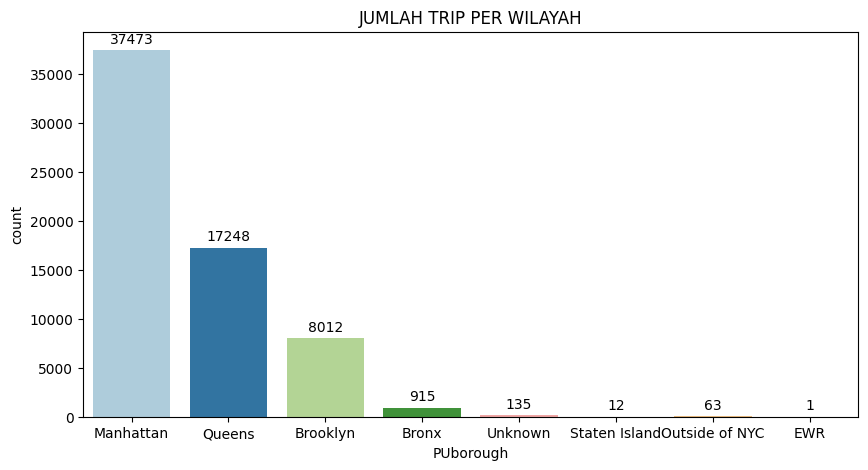

In [169]:
plt.figure(figsize=(10,5))
plots=sns.countplot(data=data_taxi,x='PUborough',palette=('Paired'))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('JUMLAH TRIP PER WILAYAH')
plt.show()

Untuk wilayah Unknown dan Outside of nyc, kita sudah berusaha untuk mencari nama wilayah tersebut namun sesuai dengan data lokasi yang di berikan NYC TLC hasil datanya seperti itu, maka akan kami biarkan dengan nam seperti itu.

Berdasarkan grafik, wilayah ***Manhattan*** merupakan wilayah yang paling banyak menarik penumpang dengan jumlah lebih dari `37 ribu` dalam sebulan atau setara dengan `58%` dari total keseluruhan, sedangkan `52%` lainnya adalah wilayah selain ***Manhattan*,** di asumsikan bahwa sebagian besar taksi hanya berpusat di wilayah ***Manhattan*** sedangkan pada wilayah lain hanya sedikit.

Perlu adanya pengkajian ulang pada wilayah wilayah selain ***Manhattan***.

In [170]:
manhattan1=data_taxi[data_taxi['PUborough']=='Manhattan']
manhattan=manhattan1.groupby('days')[['VendorID']].count().reset_index()


In [171]:
pd.set_option("display.max_columns",30)

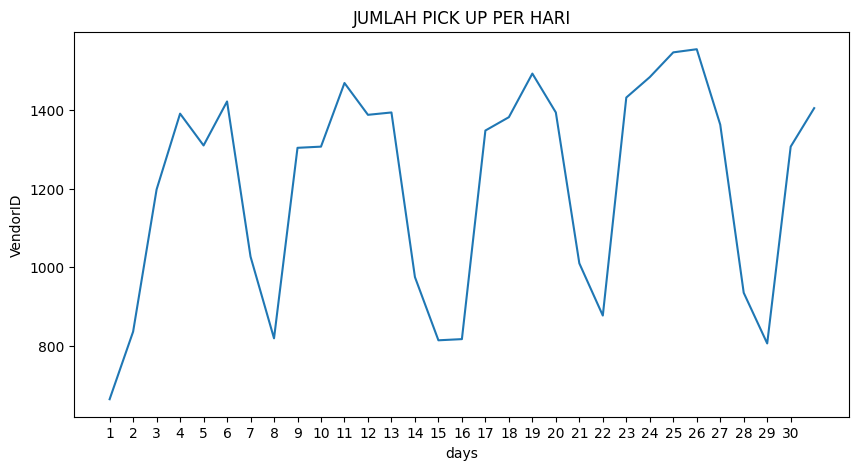

In [172]:
plt.figure(figsize=(10,5))
plots=sns.lineplot(data=manhattan,x='days',y='VendorID',palette=('Paired'))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('JUMLAH PICK UP PER HARI')
plt.xticks(np.arange(1,31,1))
plt.show()

In [173]:
manhattan1['trip_distance'].median()

np.float64(1.75)

Jika dilihat dari grafik trend harian wilayah **Manhattan** dapat menarik penumpang pada range **600 hingga lebih dari 1400 kali** dalam sehari, rata rata trip distance di **Manhattan** sendiri adalah `1,75` mil per penumpang.   

In [174]:
order=data_taxi.sort_values('DOborough',ascending=False)['DOborough']
order

16036    Unknown
3695     Unknown
36010    Unknown
792      Unknown
59532    Unknown
          ...   
36117      Bronx
37857      Bronx
19170      Bronx
8371       Bronx
6813       Bronx
Name: DOborough, Length: 63859, dtype: object

In [223]:
plt.figure(figsize=(10,5))
plots=sns.countplot(data=data_taxi,x='DOborough',palette=('Paired'))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('TOTAL DROP OFF PER WILAYAH')
    
plt.show()

Pada `drop off borough` sendiri wilayah ***Manhattan*** tetap tertinggi dengan lebih dari `37 ribu` kali drop off, apabila melihat grafik pick up **Manhattan** tidak jauh beda jumlahnya dengan grafik drop off, dari sini kita mengetahui penumpang dari manhattan rata rata hanya menggunakan taksi untuk di sekitar ***Manhattan*** saja dilihat dari trip distance nya rata rata hanya menghabiskan rata rata `1.75 mil`

### **1.2 Berdasarkan pick up zone**

Karena pick up zone ini memliki unique sebanyak 256 maka kita hanya akan membatasi dengan 15 zona teratas dan terendah saja.

In [176]:
# pengambilan 15 zona teratas
data=data_taxi['PULocationID'].value_counts().head(15).index
top_15=data_taxi[data_taxi['PULocationID'].isin(data)]
data

Index([74, 75, 95, 41, 166, 82, 43, 97, 7, 244, 42, 65, 260, 129, 130], dtype='int64', name='PULocationID')

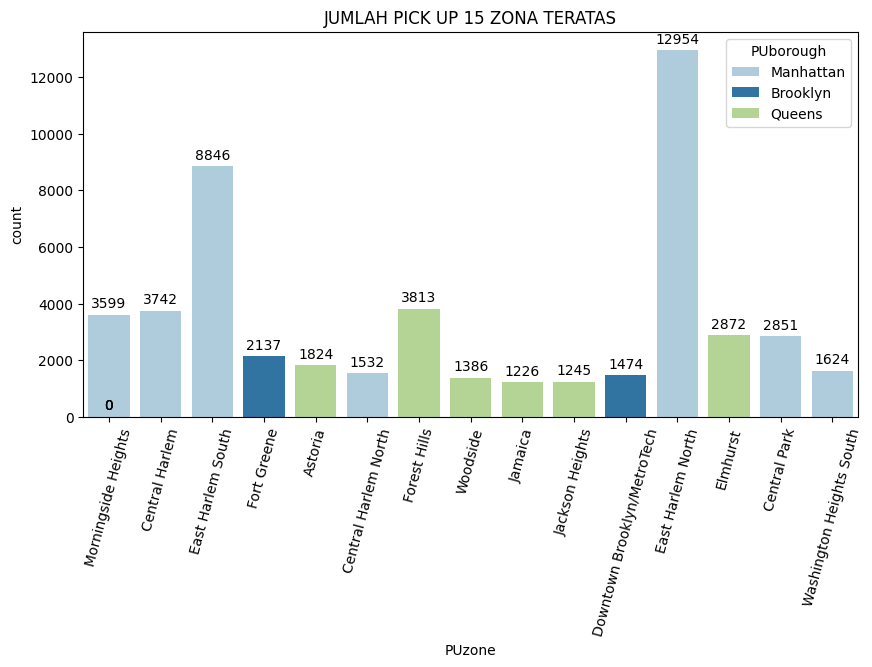

In [177]:
plt.figure(figsize=(10,5))
plots=sns.countplot(data=top_15,x='PUzone',hue='PUborough',palette=('Paired'))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('JUMLAH PICK UP 15 ZONA TERATAS')
plt.xticks(rotation=75)
plt.show()

Pada 15 zona teratas jumlah pick up selama sebulan berada di range` 1000-3000 kali pick up`, namun ada dua wilayah yaitu ***East harlem north*** dan ***East Harlem South*** yang mencapai angka,
`12000 dan 8000 kali pick up` dalam sebulan. 
- Jika dilihat kembali berdasarkan borough, wilayah ***Queens dan Manhattan*** sama sama mempunyai 6 zona yang masuk pada top 15 
- namun jika melihat berdasarkan total pick up wilayah ***Manhattan*** yang mempunyai zona dengan total pick up yang tinggi.

In [178]:
zona=top_15.groupby('days')[['PUzone']].count().reset_index()


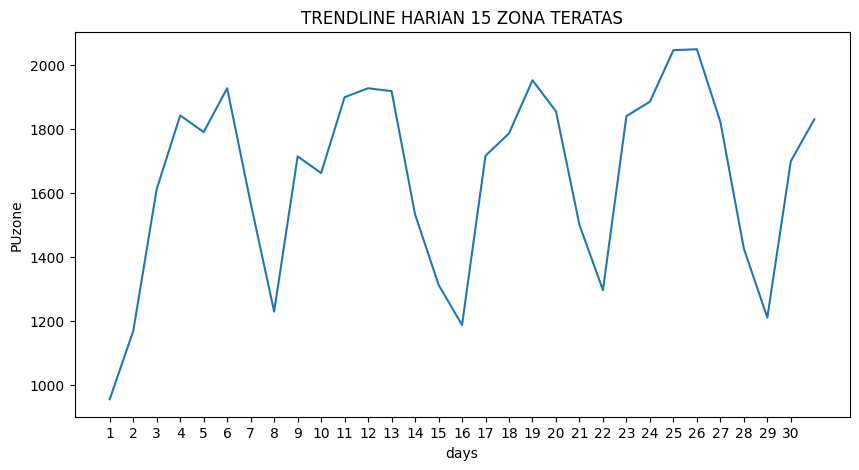

In [179]:
plt.figure(figsize=(10,5))
plots=sns.lineplot(data=zona,x='days',y='PUzone',palette=('Paired'))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('TRENDLINE HARIAN 15 ZONA TERATAS')
plt.xticks(np.arange(1,31,1))
plt.show()

In [180]:
top_15['trip_distance'].median()

np.float64(1.79)

Trend harian pada 15 wilayah teratas menunjukan pengemudi berhasil mendapatkan rata rata `1000 hingga 2000` penumpang per hari, dengan nilai terendah ada di tanggal `1 januari` hanya mendapatkan `954` pick up sedangkan untuk nilai tertinggi nya ada di tanggal `25 januari` sebanyak `2045` pick up,

dan juga pada 15 wilayah ini rata rata jarak trip nya hanya di angka` 1.79 mil`.

In [181]:
data_rendah=data_taxi['PULocationID'].value_counts().tail(15).index
bottom_15=data_taxi[data_taxi['PULocationID'].isin(data_rendah)]


In [211]:
bottom_15.groupby(['PUzone','trip_type'])[['PUzone']].count()

PUzone
PUzone                        trip_type          
City Island                   Street-hail       1
Clinton West                  Street-hail       1
East Village                  Street-hail       1
Financial District North      Street-hail       1
Greenwich Village North       Street-hail       1
Lincoln Square West           Street-hail       1
Newark Airport                Dispatch          1
Penn Station/Madison Sq West  Street-hail       1
Rockaway Park                 Street-hail       1
South Beach/Dongan Hills      Street-hail       1
Sutton Place/Turtle Bay North Street-hail       1
UN/Turtle Bay South           Street-hail       1
Union Sq                      Street-hail       1
West Brighton                 Street-hail       1
West Chelsea/Hudson Yards     Street-hail       1

Pada 15 wilayah terendah semuanya hanya mendapatkan 1 kali pick up dalam sebulan itu artinya keterbatasan jumlah green taksi membuat persebaran taksi sendiri tidak merata sehingga sangat terlihat perbedaaan yang jauh antara jumlah 15 teratas dan 15 terbawah, berdasarkan borough nya 15 terbawah pun di dominasi oleh wilayah ***Manhattan*** berarti pada wilayah ***Manhattan*** pun sendiri taksi tidak tersebar rata ke seluruh zona di dalamnya.

Dan 15 wilayah terendah hampir semua wilayahnya naik taksi dengan metode street hail, semakin terlihat bahwa armada taksi yang tersedia di 15 wilayah ini sangat sedikit.

### **1.3 Berdasarkan drop off zone**

sama seperti ketika analisis pick up, pada analisis drop off kita juga akan membagi menjadi dua bagian yaitu 15 tempat tertinggi dan terendah.

In [185]:
data=data_taxi['DOLocationID'].value_counts().head(15).index
top_15=data_taxi[data_taxi['DOLocationID'].isin(data)]

In [186]:
data_taxi['DOzone'].value_counts()

DOzone
East Harlem South                      3414
East Harlem North                      3297
Upper East Side North                  2655
Central Harlem                         2529
Central Harlem North                   2247
                                       ... 
Port Richmond                             1
Green-Wood Cemetery                       1
Mariners Harbor                           1
South Beach/Dongan Hills                  1
Breezy Point/Fort Tilden/Riis Beach       1
Name: count, Length: 247, dtype: int64

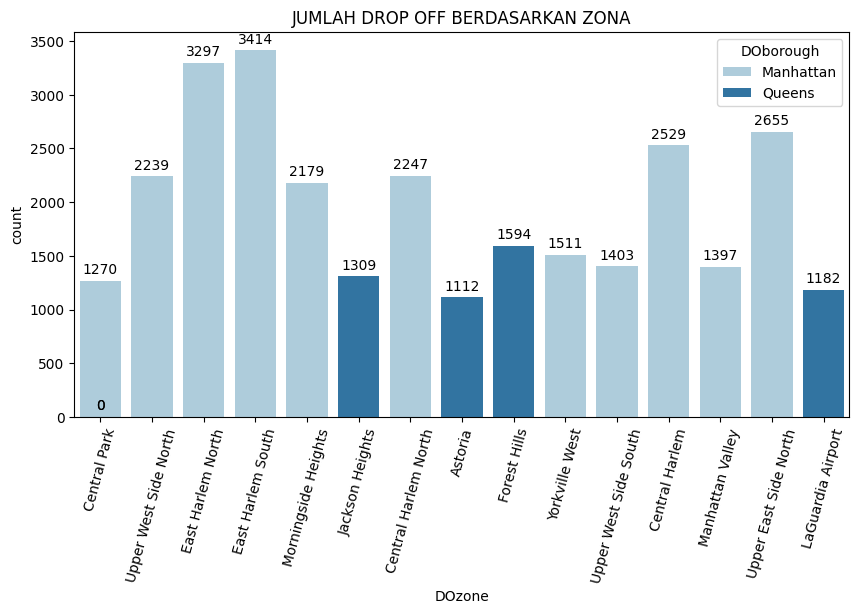

In [212]:
plt.figure(figsize=(10,5))
plots=sns.countplot(data=top_15,x='DOzone',hue='DOborough',palette=('Paired'))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('JUMLAH DROP OFF BERDASARKAN ZONA')
plt.xticks(rotation=75)
plt.show()

untuk 15 zona drop off teratas hanya mencakup wilayah ***Manhattan*** dan ***Queens*** saja, dengan rata rata jumlah drop off `1000-3000` lebih dalam sebulan. Dengan dua wilayah terbanyak yaitu ***East Harlem South*** dan ***East Harlem North*** apabila kita lihat kembali data paling banyak pick up ada di kedua wilayah yang sama.

Berdasarkan hal itu kita mengetahui bahwa zona East Harlem North dan East Harlem South merupakan zona dengan jumlah permintaan taksi terbanyak, karena kedua wilayah ini merupakan wilayah dengan pemukiman padat.

In [188]:
zona=top_15.groupby('days')[['DOzone']].count().reset_index()

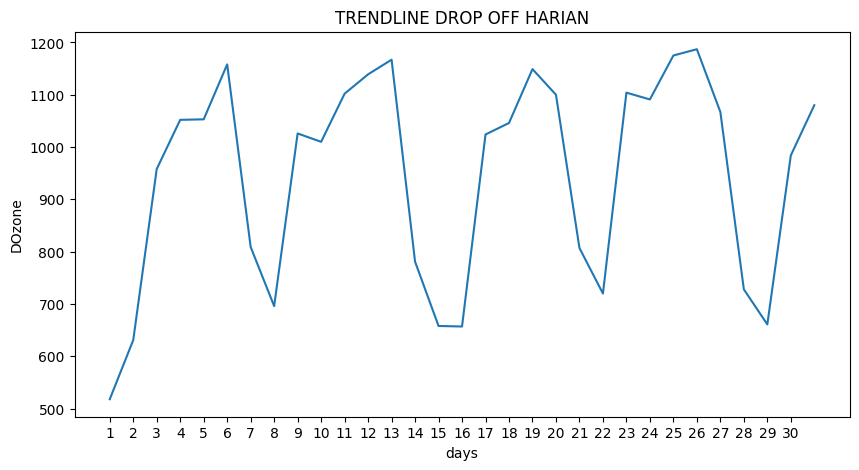

In [213]:
plt.figure(figsize=(10,5))
plots=sns.lineplot(data=zona,x='days',y='DOzone',palette=('Paired'))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('TRENDLINE DROP OFF HARIAN')
plt.xticks(np.arange(1,31,1))
plt.show()

Pada 15 zona drop off ini, jumlah rata rata nya berada di angka `500 hingga 1200` drop off per hari dengan nilai terendah ada di tanggal `1 januari` total drop off hanya `500` penumpang sedangkan nilai tertinggi terdapat pada tanggal  `26 januari` dengan jumlah drop off debanyak `1184` penumpang.

In [190]:
east=data_taxi[data_taxi['DOzone']=='East Harlem South']
east['PUzone'].value_counts().head()

PUzone
East Harlem North       1970
East Harlem South        747
Central Harlem           248
Morningside Heights      114
Central Harlem North      87
Name: count, dtype: int64

sebagian besar penumpang yang turun di zona ***East harlem south***, merupakan penumpang yang di pick up pada zona ***East Harlem North*** dengan total 1969 pick up. Memang jika di lihat dari data kebanyakan penumpang berpusat di antara ***East Harlem North*** dan ***East Harlem South*** karena kedua wilayah tersebut merupakan pemukiman terbesar yang di dominasi oleh amerika latin di new york city.

### **1.4 Berdasarkan Ratecode**

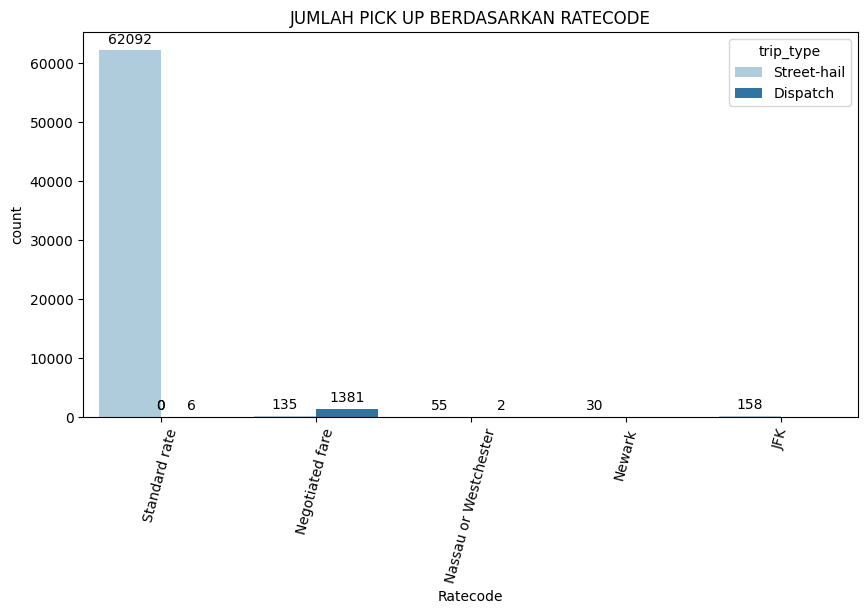

In [214]:
plt.figure(figsize=(10,5))
plots=sns.countplot(data=data_taxi,x='Ratecode',hue='trip_type',palette=('Paired'))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('JUMLAH PICK UP BERDASARKAN RATECODE')
plt.xticks(rotation=75)
plt.show()

Hampir seluruh penumpang menggunakan taksi dengan layanan standard selain karena mudah di temukan, layanan standard juga mempunyai tarif yang lebih murah dan juga layanan standard biasanya digunakan untuk perjalanan umum dengan jarak yang dekat cara memanggil nya pun hampir semua di lakukan dengan street-hail.

Sedangkan layanan negotiated fare yang mempunyai karasteristik kurang lebih sama dengan standard namun kebanyakan penumpang yang meminta negotiated fare ketika memanggil taksi dengan cara dispatch.

Pada layanan bandara tarifnya lebih tinggi di bandingkan layanan yang lain.

## **2. Menganalisis pendapatan taksi**

### **2.1 Pendapatan perusahaan**

In [192]:
## uji normalitas
from scipy.stats import shapiro
shapiro(data_taxi['total_amount'])

ShapiroResult(statistic=np.float64(0.7417842126726448), pvalue=np.float64(1.409407798465807e-128))

Data tidak terdistribusi normal karena pvalue kurang dari 0.05

In [193]:
# Pendapatan keseluruhan
display(data_taxi['total_amount'].sum(),data_taxi['total_amount'].median())

np.float64(1350037.01)

np.float64(17.5)

In [194]:
# pendapatan kepada perusahaan 
plt.figure(figsize=(10,5))

fig = px.pie(data_taxi,
             names = "Vendorname", 
             values= "total_amount",
             title = "Total pendapatan perusahaan")
fig.show()

plots=sns.barplot(data=data_taxi,x='Vendorname',y='total_amount',estimator='median',palette=('Paired'))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Rata Rata Pendapatan Per Trip')
plt.show()


Berdasarkan grafik di atas vendor ``VeriFone Inc.`` mendapatkan penghasilan kotor sebesar ``85.7% `` dari total keseluruhan pendapatan, sedangkan untuk ``Creative Mobile Technologies, LLC.`` hanya mendapatkan ``14.3%`` dari total keseluruhan.
Di asumsikan bahwa ``VeriFone Inc`` memiliki lebih banyak jumlah taksi.

Namun kedua perusahaan memiliki rata rata penghasilan per trip di angka 17.50 dan 17.55, `Creative Mobile Technologies `lebih banyak verifone inc, untuk membuktikan `Creative Mobile Technologis `lebih banyak atau tidak kita akan melekukan uji hipotesis.

Hypothesis
- Ho: Mean Verifone inc = Mean Cretive Mobile Technologies, LLC.
- Ha: Mean Verifone inc ≠ Mean Cretive Mobile Technologies, LLC.

In [195]:
from scipy.stats import mannwhitneyu
data_taxi.groupby('Vendorname')[['total_amount']].median()

total_amount
Vendorname                                      
Creative Mobile Technologies, LLC.         17.55
VeriFone Inc.                              17.46

In [196]:
stat, pvalue = mannwhitneyu(
    data_taxi[data_taxi['Vendorname']=='VeriFone Inc.']['total_amount'],
    data_taxi[data_taxi['Vendorname']=='Creative Mobile Technologies, LLC.']['total_amount'],
)

pvalue

np.float64(0.3223099500497535)

In [ ]:
if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. pvalue > 0.05. Gagal menolak Ho. 
    Kita punya cukup bukti bahwa mean VeriFone Inc.
    TIDAK BERBEDA SIGNIFIKAN dengan mean Creative Mobile Technologies, LLC..
    ''')
else:
    print(f'''
    pvalue = {pvalue}. pvalue <= 0.05. Menolak Ho. 
    Kita TIDAK punya cukup bukti bahwa mean VeriFone Inc.
    TIDAK BERBEDA SIGNIFIKAN dengan Creative Mobile Technologies, LLC.
    ''')


    pvalue = 0.3223099500497535. pvalue > 0.05. Gagal menolak Ho. 
    Kita punya cukup bukti bahwa mean VeriFone Inc.
    TIDAK BERBEDA SIGNIFIKAN dengan mean Creative Mobile Technologies, LLC..
    


### **2.2 Pendapatan per hari**

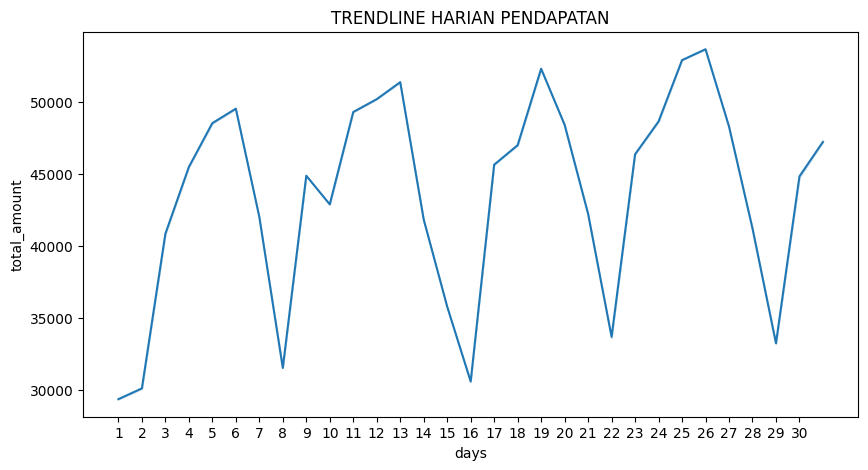

In [215]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data_taxi,x='days',y='total_amount',ci=0,estimator='sum')
plt.xticks(np.arange(1,31,1))
plt.title('TRENDLINE HARIAN PENDAPATAN')
plt.show()

- Tren pendapatan harian membentuk pola fluktuatif pada range pendapatan `30ribu` hingga lebih dari `50ribu` sangat tajam antara kenaikan dan penurunannya di awali dengan nilai terendah pada tanggal `1 januari `berjumlah kurang dari `30ribu` dollar dan nilai tertingginya lebih dari `50ribu` dollar.

- Dari analisis tren tersebut 2 minggu pertama selalu mengalami penurunan setiap tujuh hari sedangkan pada 2 minggu terakhir mengalami penurunan setiap enam hari. 

- Dimana penurunan teradi di setiap hari minggu apabila dikaitkan dengan kondisi nyata biasanya pada hari minggu orang lebih banyak menghabiskan waktu menggunakan mobil pribadi dibanding naik taksi. 

### **2.3 Pendapatan borough**

In [216]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plots=sns.barplot(data=data_taxi,x='PUborough',y='total_amount',estimator='sum',palette=('Paired'))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('TOTAL PENDAPATAN PER WILAYAH')
plt.subplot(1,2,2)
plots=sns.barplot(data=data_taxi,x='PUborough',y='total_amount',estimator='median',palette=('Paired'),ci=0)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('RATA RATA PENDAPATAN PERWILAYAH')
plt.show()


In [225]:
data_taxi.groupby('PUborough')[['trip_distance']].mean()

trip_distance
PUborough                    
Bronx                2.033005
Brooklyn             2.959375
EWR                  0.000000
Manhattan            2.381537
Outside of NYC       5.047937
Queens               2.770575
Staten Island        2.730833
Unknown              0.482519

Penghasilan wilayah terbesar tentunya ada di wilayah ***Manhattan*** karena dari jumlah pick up nya tadi sangat mendominasi, didapatkan sebesar `55.67%` dari total keseluruhan pendapatan sedangkan wilayah sisanya hanya mendapatkan `44.33%` dari seluruh, walaupun ***Manhattan*** mendapati total seluruh pendapatan yang banyak namun jika melihat rata rata per trip nya hanya sekitar `17.10` dollar, di bandingkan dengan yang lain nilai ini merupakan nilai yang cukup rendah, oleh karena itu butuh pengkajian ulang mengenai tarif di wilayah **Manhattan**.

Jika melihat dari grafik untuk rata rata penghasil per trip wilayah ***EWR*** paling tinggi namun kita tidak bisa menyebut wilayah tersebut paling tinggi karena jika di lihat dari jumlah pick up nya wilayah EWR hanya mempunyai 1 data pick up, sehingga wilayah tersebut tidak bisa menjadi acuan.

### **2.4 Pendapatan payment type**

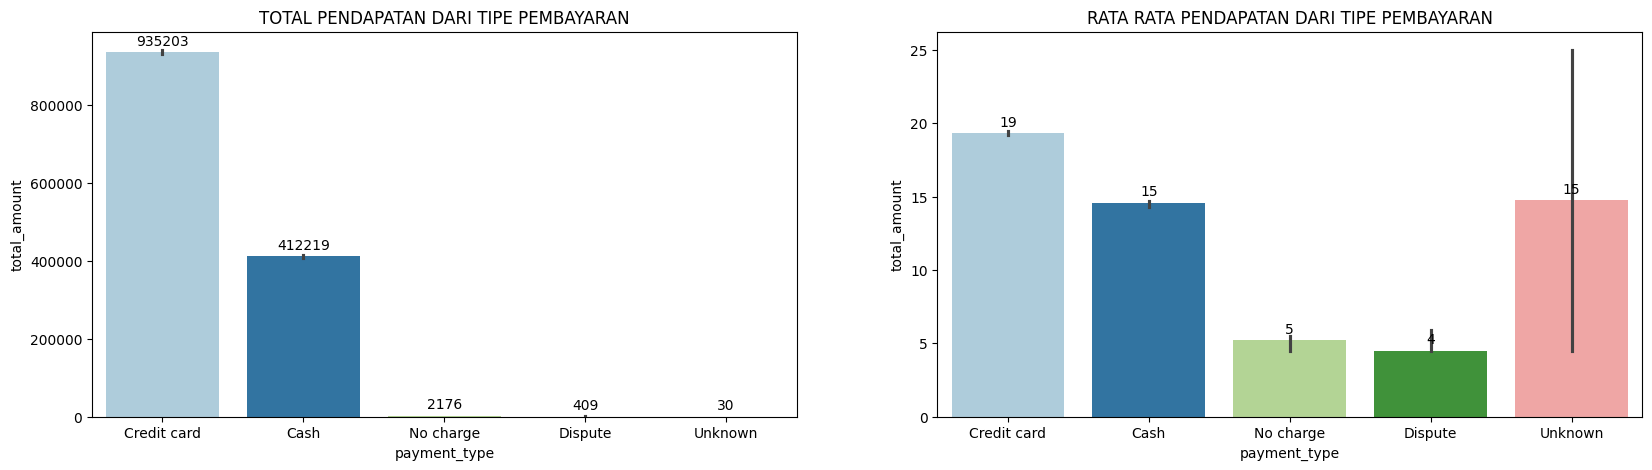

In [217]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plots=sns.barplot(data=data_taxi,x='payment_type',y='total_amount',estimator='sum',palette=('Paired'))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('TOTAL PENDAPATAN DARI TIPE PEMBAYARAN')
plt.subplot(1,2,2)
plots=sns.barplot(data=data_taxi,x='payment_type',y='total_amount',estimator='median',palette=('Paired'))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('RATA RATA PENDAPATAN DARI TIPE PEMBAYARAN')
plt.show()


Dengan menganalisis `payment type` didapati informasi bahwa `credit card` menjadi metode pambayaran yang sering digunakan penumpang, dari `credit card` mendapat total penghasilan lebih dari `930 ribu` dollar atau jika dipersenkan setara dengan `69.19%` dari total keseluruhan karena dari informasi yang ditemukan bahwa
pengguna credit card di amerika telah mencapai `523 juta` orang dan konsumen yang menyukai transaksi dengan `credit card` tumbuh sebanyak `39%`. Ini menjadi salah satu faktor utama.

### **2.5 Pendapatan ratecode**

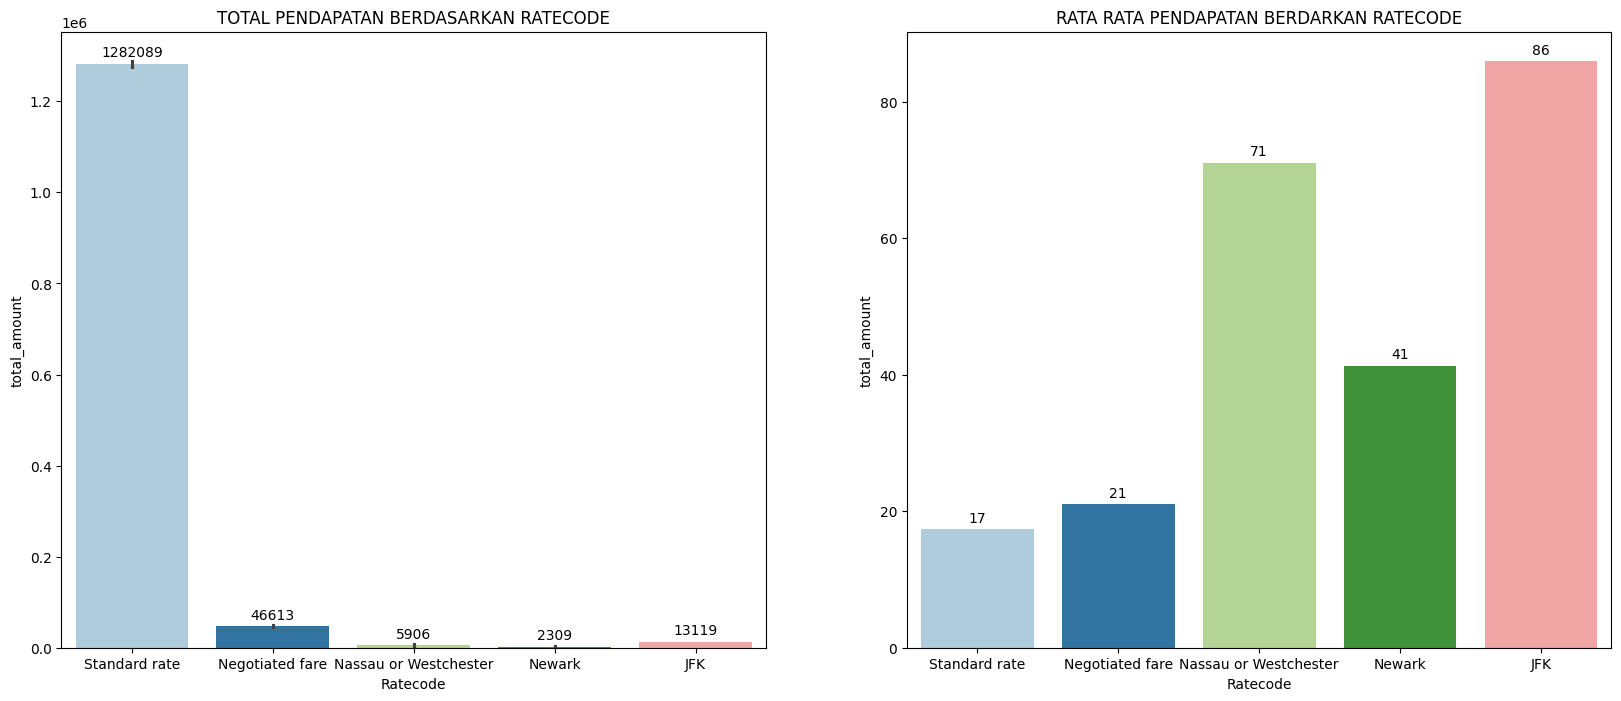

In [219]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plots=sns.barplot(data=data_taxi,x='Ratecode',y='total_amount',estimator='sum',palette=('Paired'))
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('TOTAL PENDAPATAN BERDASARKAN RATECODE')

plt.subplot(1,2,2)
plots=sns.barplot(data=data_taxi,x='Ratecode',y='total_amount',estimator='median',palette=('Paired'),ci=0)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.title('RATA RATA PENDAPATAN BERDARKAN RATECODE')
plt.show()

Setelah analisis diawal sudah bisa kita pastikan pendapatan terbanyak akan ada di tipe `standard rate`, total lebih dari `1.2 juta` dollar atau sekitar `94.94%`, namun dari sini terlihat gap yang sangat jauh dengan tipe layanan lainnya maka hal ini perlu kita evaluasi jika melihat rata rata tarif per trip justru `standard rate` tarif nya sangat kecil hanya `17 dollar` per trip sedangkan pada `JFk` sendiri per trip nya mencapai `86 dollar`.

### **2.6 Pendapatan berdasarkan tipe trip**

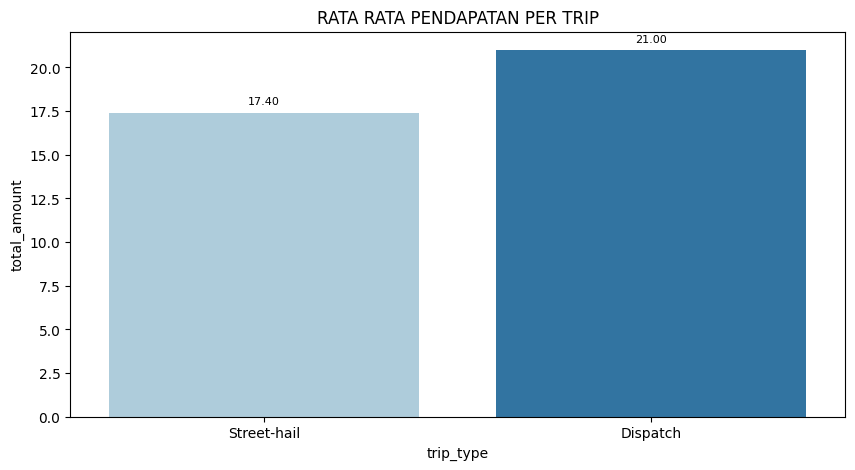

In [221]:
# pendapatan kepada perusahaan 
plt.figure(figsize=(10,5))

fig = px.pie(data_taxi,
             names = "trip_type", 
             values= "total_amount",
             title = "TOTAL PEMDAPATAN BERDARKAN TIPE PERJALANAN")
fig.show()

plots=sns.barplot(data=data_taxi,x='trip_type',y='total_amount',estimator='median',palette=('Paired'),ci=0)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),             
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.title('RATA RATA PENDAPATAN PER TRIP')
plt.show()

Pendapatan street hail tentu akan lebih banyak dari dispatch karena mayoritas penumpang akan lebih tertarik naik taksi langsung tanpa harus menunggu, namun jika melihat rata rata pendapatan per trip, tipe dispatch lebih besar dari street hail. Karena tipe dispatch sendiri dikenakan tarif yang lebih tinggi dari street hail.

## **Kesimpulan**
**Analisis wilayah**
- Sebagian besar taksi hanya beroperasi disekitar Manhattan.
- East Harlem North dan East Harlem South merupakan zona dengan permintaan taksi yang cukup tinggi dibanding zona lainnya.
- Berdasarkan top 15 rata rata dibutuhkan sekitar 200-500 penumpang untuk meningkat seperti zona zona tersebut.
- 15 zona terbawah hanya mendapatkan satu kali pick up dalam satu bulan, jika di asumsikan zona zona terendah ini kemungkinan besar jarang ada taksi yang beroperasi disana, karena mayoritas penumpang naik dengan street hail.
- Mayoritas penumpang juga menggunakan taksi dengan standard rate karena banyak tersebar di wilayah wilayah, namun layanan lain juga banyak diminati seperti negotiated fare,newark,jfk dan nassau or menchester hanya saja lebih banyak taksi yang beroperasi standard rate di banding yang lainnya.

**Analisis pendapatan**
- Total keseluruhan pendapatan mencapai lebih dari 1,3juta dollar pada bulan januari 2023 ini. Dengan rata rata pendapatan per trip 17.5 dollar.
- Dari kedua vendor, VeriFone Inc. meraih pendatan sebesar 85.7% dari total keseluruhan sedangkan Creative Mobile Technologies, LLC. mendapatkan 14.3% sedangkan rata rata nya per trip nya tidak berbeda signifikan maka hal ini di asumsikan karena VeriFone Inc memiliki armada yang lebih banyak.
- Melihat total pendapatan per borough (wilayah), Manhattan dan Queens mendominasi namun jika melihat performa rata rata nya justru kedua wilayah tersebut menjadi dua terendah, mengambil contoh dari Manhattan rata rata per trip nya hanya 1,75 mil.
- Pendapatan tertinggi berdasarkan tipe pembayaran adalah credit cash berdasarkan ini penumpang lebih sering menggunakan pembayaran dengan cashless di banding pembayaran lainnya
- mayoritas penumpang naik taksi dengan standard rate, namun jika melihat performa rata rata pendapatan wilayah JFK lebih tinggi di banding yang lain
- untuk performa trip type sendiri berdasarkan rata rata nya dispatch lebih tinggi daripada street hail.

## **Rekomendasi**
- sebelum penambahan armada perlu adanya pengenalan green taxi lagi kepada orang orang di sekitar wilayah yang dijangkau green taxi tentang kenapa perlu untuk menggunakan green taxi, apa manfaatnya dan juga kemudahan yang ditawarkan.
- Penambahan armada taksi diperlukan dengan fokus pada wilayah yang masih rendah total pick up dan pendapatannya, karena rata rata penumpang masih mengandalkan street hail untuk naik taksi, sehingga perlu adanya taksi yang menunggu pada masing masing zona sekitar 5-10 taksi. Jika pengemudi dapat menarik 5-10 orang dalam sehari dengan jarak 1-2 mil, maka total per hari akan mendapatkan 25-100 kali pick up.
- Penambahan armada taksi ini lebih di fokuskan juga kepada vendor Creative Mobile Technologies, karena vendor tersebut memiliki pendapatan yang jauh dari vendor VeriFone sehingga dari situ di asumsikan bahwa Creative Mobile Technologies mempunyai armada taksi yang lebih sedikit.
- wilayah JFK, Nassau or Westchester dan Newark memiliki potensi yang tinggi jika melihat dari rata rata pendapatan per trip nya, perlu adanya penambahan armada pada ketiga wilayah tersebut untuk mengjangkau lebih banyak penumpang karena pada ketiga wilayah tersebut didominasi dengan penumpang dari street hail.
- Selain penambahan aramada, diperlukan adanya penambahan tipe pembayaran cashless juga seperti debit card,qrcode, atau pembayaran digital dan metode lainnya.
- Peningkatan layanan dispatch karena layanan tersebut sangat potensial apabila dikembangkan lebih dalam, peningkatan tersebut dapat dilakukan dengan cara mempercepat pelayanan apabila ada penumpang yang menghubungi untuk menggunakan taksi dispatch dan negotiated fare, atau bisa dengan pengembangan aplikasi yang memudahkan penumpang untuk memesan taksi darimana saja dan kapan saja.

In [205]:
data_taxi.to_excel('data_taxi.xlsx')